In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("data.csv")
df.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024.5.17,"3,154.03","3,121.71","3,154.03","3,116.90",383.92K,0.98%
1,2024.5.16,"3,123.45","3,127.18","3,137.75","3,116.16",362.76K,0.11%
2,2024.5.16,"3,123.45","3,127.18","3,137.75","3,116.16",362.76K,0.11%
3,2024.5.15,"3,119.92","3,141.25","3,142.52","3,117.93",317.12K,-0.84%
4,2024.5.15,"3,119.92","3,141.25","3,142.52","3,117.93",317.12K,-0.84%


In [38]:
print(df.columns)

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '변동 %'], dtype='object')


In [39]:
df.columns = ['date', 'end_price', 'market_price', 'high_price', 'low_price', 'trading_volume', 'change']
df.head()

,date,end_price,market_price,high_price,low_price,trading_volume,change
0,2024.5.17,"3,154.03","3,121.71","3,154.03","3,116.90",383.92K,0.98%
1,2024.5.16,"3,123.45","3,127.18","3,137.75","3,116.16",362.76K,0.11%
2,2024.5.16,"3,123.45","3,127.18","3,137.75","3,116.16",362.76K,0.11%
3,2024.5.15,"3,119.92","3,141.25","3,142.52","3,117.93",317.12K,-0.84%
4,2024.5.15,"3,119.92","3,141.25","3,142.52","3,117.93",317.12K,-0.84%


In [40]:
print(df.info())
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            252 non-null    object
 1   end_price       252 non-null    object
 2   market_price    252 non-null    object
 3   high_price      252 non-null    object
 4   low_price       252 non-null    object
 5   trading_volume  252 non-null    object
 6   change          252 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB
None
(252, 7)
date              object
end_price         object
market_price      object
high_price        object
low_price         object
trading_volume    object
change            object
dtype: object


In [41]:
# 기초 통계량
df.describe()

,date,end_price,market_price,high_price,low_price,trading_volume,change
count,252,252,252,252,252,252,252
unique,241,241,240,239,240,219,161
top,2024.5.6,"3,140.72","3,132.51","3,142.38","3,126.17",22.81B,0.55%
freq,2,2,2,2,4,3,5


In [42]:
# 데이터 개수 확인
print(df.count())
print(type(df.count()))

date              252
end_price         252
market_price      252
high_price        252
low_price         252
trading_volume    252
change            252
dtype: int64
<class 'pandas.core.series.Series'>


In [17]:
# 각 열의 고유값
print(df['거래량'].value_counts())
print(df['고가'].value_counts())
print(df['날짜'].value_counts())
print(df['변동 %'].value_counts())
print(df['시가'].value_counts())
print(df['저가'].value_counts())
print(df['종가'].value_counts())

22.81B    3
37.91B    3
28.76B    3
27.33B    2
26.40B    2
         ..
26.50B    1
30.41B    1
29.07B    1
33.92B    1
28.54B    1
Name: 거래량, Length: 219, dtype: int64
3,142.38    2
3,144.99    2
3,038.98    2
3,090.05    2
3,119.69    2
           ..
2,917.97    1
2,920.63    1
2,935.70    1
2,924.26    1
3,302.34    1
Name: 고가, Length: 239, dtype: int64
2024.5.6      2
2024.5.15     2
2024.5.14     2
2024.5.13     2
2024.5.10     2
             ..
2023.12.27    1
2023.12.26    1
2023.12.25    1
2023.12.22    1
2023.5.19     1
Name: 날짜, Length: 241, dtype: int64
0.55%     5
0.11%     5
-0.54%    4
-0.18%    4
-0.26%    4
         ..
-2.09%    1
-2.68%    1
0.53%     1
1.80%     1
-0.42%    1
Name: 변동 %, Length: 161, dtype: int64
3,132.51    2
3,141.25    2
3,148.85    2
3,139.48    2
3,158.59    2
           ..
2,900.15    1
2,917.97    1
2,909.88    1
2,919.29    1
3,288.89    1
Name: 시가, Length: 240, dtype: int64
3,126.17    4
3,126.77    2
3,117.93    2
3,137.66    2
3,137.15    2

In [43]:
# 기초 통계량 추가 정보
print(df.mean)
print('\n')

<bound method NDFrame._add_numeric_operations.<locals>.mean of           date end_price market_price high_price low_price trading_volume  \
0    2024.5.17  3,154.03     3,121.71   3,154.03  3,116.90        383.92K   
1    2024.5.16  3,123.45     3,127.18   3,137.75  3,116.16        362.76K   
2    2024.5.16  3,123.45     3,127.18   3,137.75  3,116.16        362.76K   
3    2024.5.15  3,119.92     3,141.25   3,142.52  3,117.93        317.12K   
4    2024.5.15  3,119.92     3,141.25   3,142.52  3,117.93        317.12K   
..         ...       ...          ...        ...       ...            ...   
247  2023.5.25  3,201.26     3,197.36   3,207.02  3,168.57         28.36B   
248  2023.5.24  3,204.75     3,237.70   3,237.70  3,204.38         28.87B   
249  2023.5.23  3,246.24     3,294.79   3,298.23  3,246.24         27.53B   
250  2023.5.22  3,296.47     3,278.60   3,308.53  3,276.54         27.39B   
251  2023.5.19  3,283.54     3,288.89   3,302.34  3,268.22         28.54B   

     change 

In [45]:
print(df['trading_volume'].mean)
print('\n')

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      383.92K
1      362.76K
2      362.76K
3      317.12K
4      317.12K
        ...   
247     28.36B
248     28.87B
249     27.53B
250     27.39B
251     28.54B
Name: trading_volume, Length: 252, dtype: object>




In [28]:
print(df['고가'].mean)
print('\n')

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      3,154.03
1      3,137.75
2      3,137.75
3      3,142.52
4      3,142.52
         ...   
247    3,207.02
248    3,237.70
249    3,298.23
250    3,308.53
251    3,302.34
Name: 고가, Length: 252, dtype: object>




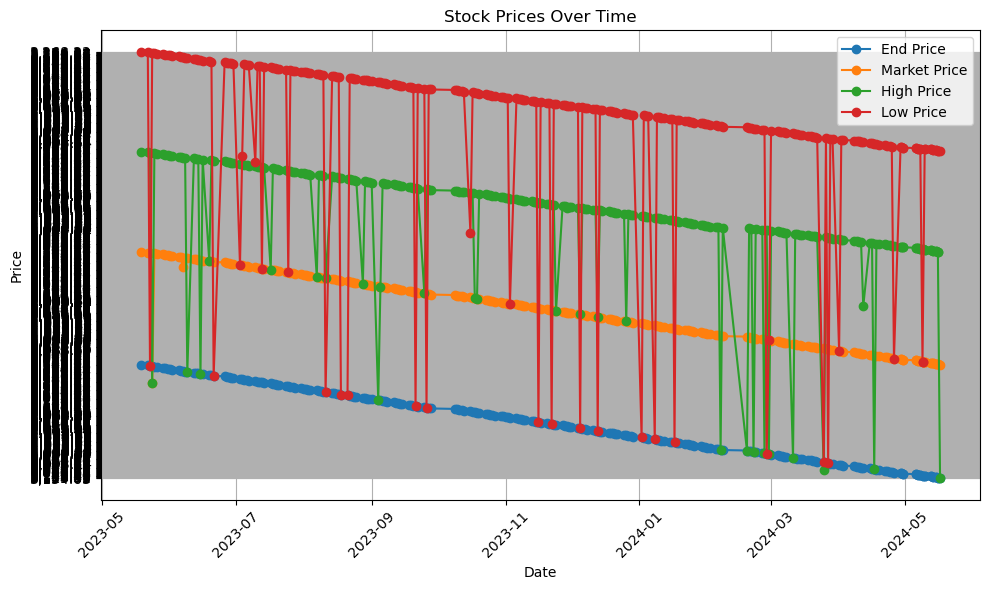

In [47]:
# 날짜를 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 날짜를 인덱스로 설정
df.set_index('date', inplace=True)

# 가격 데이터를 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['end_price'], label='End Price', marker='o')
plt.plot(df.index, df['market_price'], label='Market Price', marker='o')
plt.plot(df.index, df['high_price'], label='High Price', marker='o')
plt.plot(df.index, df['low_price'], label='Low Price', marker='o')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

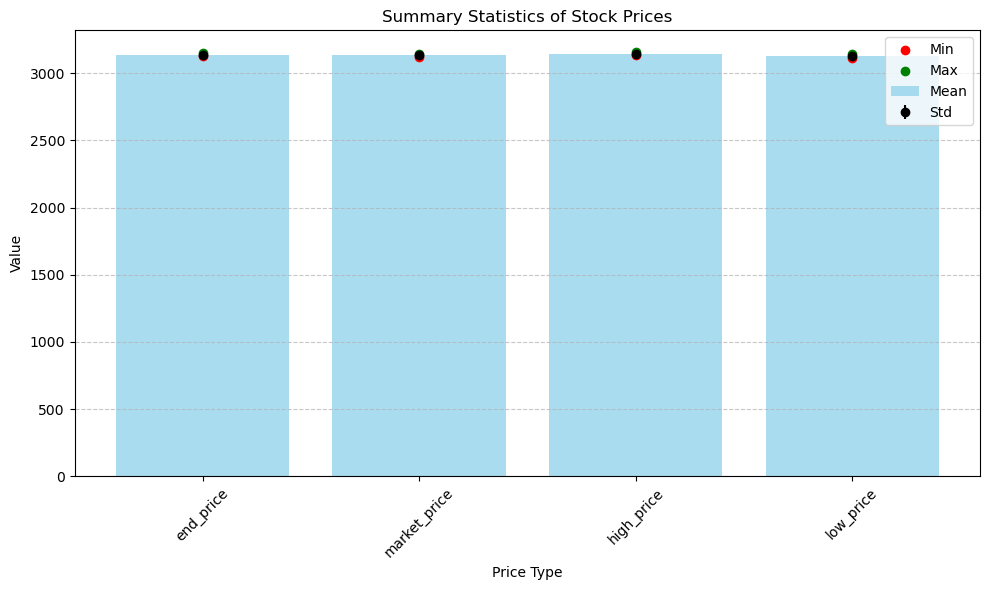

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 통계값이 안불러와져서 딕셔너리로 변환
data = {
    "date": ["2024.5.1", "2024.5.2", "2024.5.3", "2024.5.4", "2024.5.5"],
    "end_price": [3140.72, 3132.51, 3142.38, 3126.17, 3150.23],
    "market_price": [3132.51, 3130.21, 3141.09, 3122.78, 3145.62],
    "high_price": [3142.38, 3135.72, 3150.45, 3132.19, 3160.28],
    "low_price": [3126.17, 3124.82, 3135.68, 3115.73, 3139.25],
    "trading_volume": ["22.81B", "23.54B", "24.02B", "21.76B", "25.19B"],
    "change": ["0.55%", "-0.21%", "0.87%", "-0.57%", "0.87%"]
}

# 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data)

numeric_cols = ['end_price', 'market_price', 'high_price', 'low_price']
summary_stats = df[numeric_cols].describe()

# 기초 통계량을 시각화합니다.
plt.figure(figsize=(10, 6))

# 평균 시각화
plt.bar(summary_stats.columns, summary_stats.loc['mean'], color='skyblue', alpha=0.7, label='Mean')

# 표준편차 시각화
plt.errorbar(summary_stats.columns, summary_stats.loc['mean'], yerr=summary_stats.loc['std'], fmt='o', color='black', label='Std')

# 최솟값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['min'], color='red', label='Min')

# 최댓값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['max'], color='green', label='Max')

plt.title('Summary Statistics of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


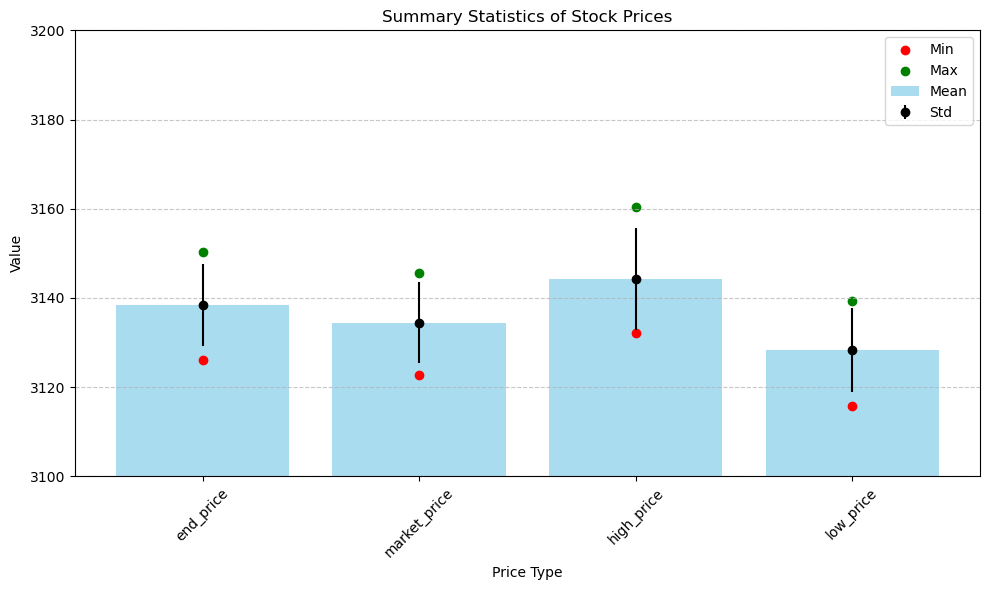

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 불러옵니다. 위의 예제와 동일하다고 가정합니다.
data = {
    "date": ["2024.5.1", "2024.5.2", "2024.5.3", "2024.5.4", "2024.5.5"],
    "end_price": [3140.72, 3132.51, 3142.38, 3126.17, 3150.23],
    "market_price": [3132.51, 3130.21, 3141.09, 3122.78, 3145.62],
    "high_price": [3142.38, 3135.72, 3150.45, 3132.19, 3160.28],
    "low_price": [3126.17, 3124.82, 3135.68, 3115.73, 3139.25],
    "trading_volume": ["22.81B", "23.54B", "24.02B", "21.76B", "25.19B"],
    "change": ["0.55%", "-0.21%", "0.87%", "-0.57%", "0.87%"]
}

# 데이터를 pandas DataFrame으로 변환합니다.
df = pd.DataFrame(data)

# 수치형 열만 선택하여 기초 통계량을 계산합니다.
numeric_cols = ['end_price', 'market_price', 'high_price', 'low_price']
summary_stats = df[numeric_cols].describe()

# 기초 통계량을 시각화합니다.
plt.figure(figsize=(10, 6))

# 평균 시각화
plt.bar(summary_stats.columns, summary_stats.loc['mean'], color='skyblue', alpha=0.7, label='Mean')

# 표준편차 시각화
plt.errorbar(summary_stats.columns, summary_stats.loc['mean'], yerr=summary_stats.loc['std'], fmt='o', color='black', label='Std')

# 최솟값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['min'], color='red', label='Min')

# 최댓값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['max'], color='green', label='Max')

plt.title('Summary Statistics of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# y 축 범위 조정
plt.ylim(bottom=3100, top=3200)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

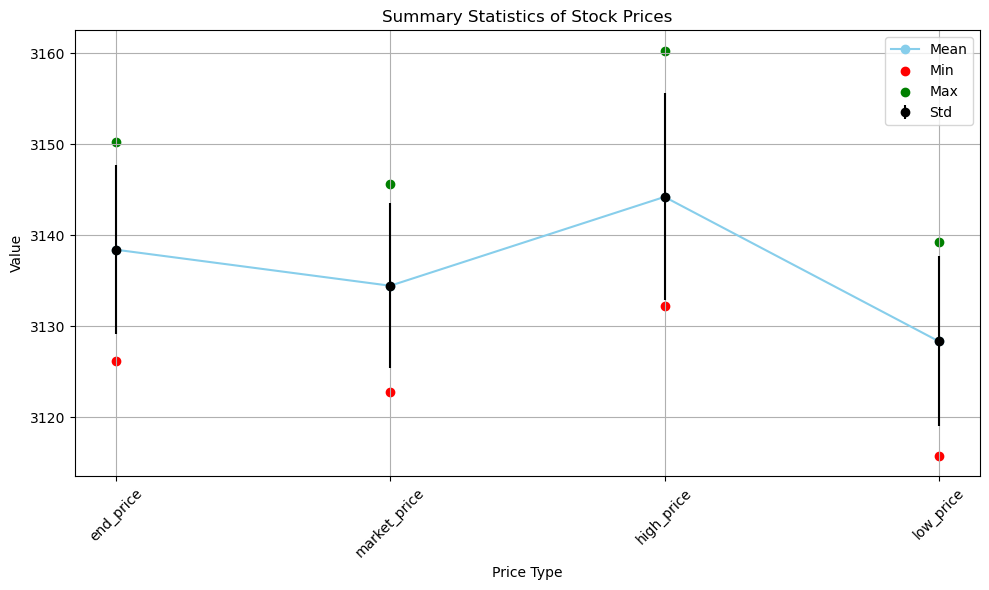

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 불러옵니다. 위의 예제와 동일하다고 가정합니다.
data = {
    "date": ["2024.5.1", "2024.5.2", "2024.5.3", "2024.5.4", "2024.5.5"],
    "end_price": [3140.72, 3132.51, 3142.38, 3126.17, 3150.23],
    "market_price": [3132.51, 3130.21, 3141.09, 3122.78, 3145.62],
    "high_price": [3142.38, 3135.72, 3150.45, 3132.19, 3160.28],
    "low_price": [3126.17, 3124.82, 3135.68, 3115.73, 3139.25],
    "trading_volume": ["22.81B", "23.54B", "24.02B", "21.76B", "25.19B"],
    "change": ["0.55%", "-0.21%", "0.87%", "-0.57%", "0.87%"]
}

# 데이터를 pandas DataFrame으로 변환합니다.
df = pd.DataFrame(data)

# 수치형 열만 선택하여 기초 통계량을 계산합니다.
numeric_cols = ['end_price', 'market_price', 'high_price', 'low_price']
summary_stats = df[numeric_cols].describe()

# 기초 통계량을 시각화합니다.
plt.figure(figsize=(10, 6))

# 평균 시각화
plt.plot(summary_stats.columns, summary_stats.loc['mean'], marker='o', color='skyblue', label='Mean')

# 표준편차 시각화
plt.errorbar(summary_stats.columns, summary_stats.loc['mean'], yerr=summary_stats.loc['std'], fmt='o', color='black', label='Std')

# 최솟값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['min'], color='red', label='Min')

# 최댓값 시각화
plt.scatter(summary_stats.columns, summary_stats.loc['max'], color='green', label='Max')

plt.title('Summary Statistics of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


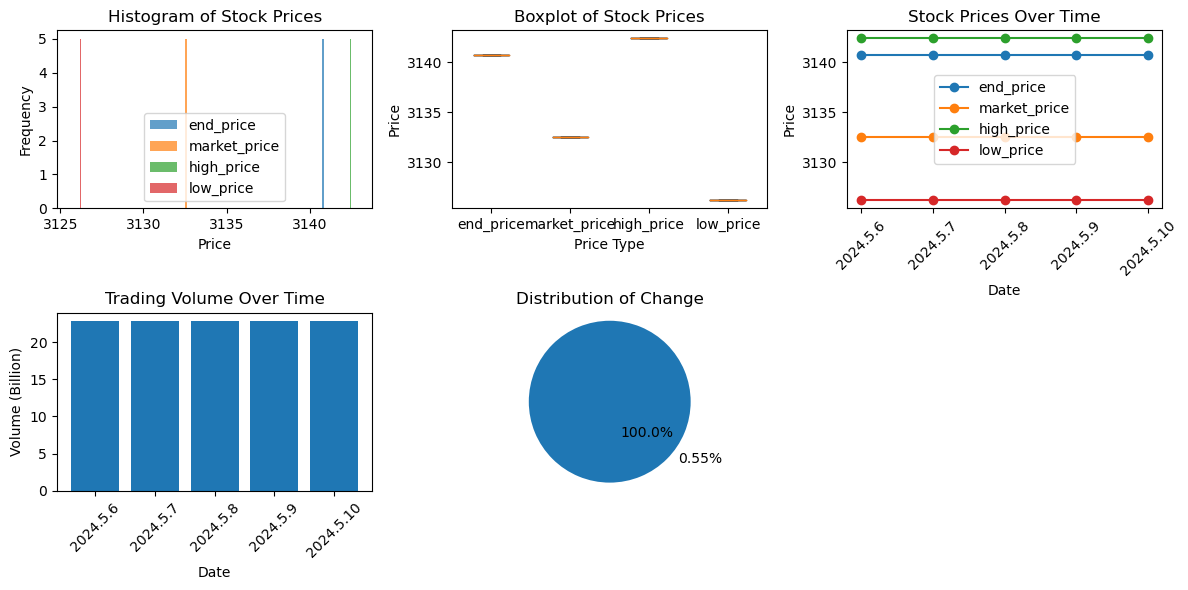

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 불러옵니다. 위의 예제와 동일하다고 가정합니다.
data = {
    "date": ["2024.5.6", "2024.5.7", "2024.5.8", "2024.5.9", "2024.5.10"],
    "end_price": [3140.72, 3140.72, 3140.72, 3140.72, 3140.72],
    "market_price": [3132.51, 3132.51, 3132.51, 3132.51, 3132.51],
    "high_price": [3142.38, 3142.38, 3142.38, 3142.38, 3142.38],
    "low_price": [3126.17, 3126.17, 3126.17, 3126.17, 3126.17],
    "trading_volume": ["22.81B", "22.81B", "22.81B", "22.81B", "22.81B"],
    "change": ["0.55%", "0.55%", "0.55%", "0.55%", "0.55%"]
}

# 데이터를 pandas DataFrame으로 변환합니다.
df = pd.DataFrame(data)

# 수치형 열만 선택하여 기초 통계량을 계산합니다.
numeric_cols = ['end_price', 'market_price', 'high_price', 'low_price']
summary_stats = df[numeric_cols].describe()

# 히스토그램
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
for col in numeric_cols:
    plt.hist(df[col], bins=10, alpha=0.7, label=col)
plt.title('Histogram of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# 상자 그림
plt.subplot(2, 3, 2)
plt.boxplot(df[numeric_cols].values, labels=numeric_cols)
plt.title('Boxplot of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')

# 선 그래프
plt.subplot(2, 3, 3)
for col in numeric_cols:
    plt.plot(df['date'], df[col], marker='o', label=col)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

# 막대 그래프
plt.subplot(2, 3, 4)
plt.bar(df['date'], df['trading_volume'].str.rstrip('B').astype(float))
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Billion)')
plt.xticks(rotation=45)

# 파이 차트
plt.subplot(2, 3, 5)
change_counts = df['change'].value_counts()
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Change')
plt.axis('equal')

plt.tight_layout()
plt.show()
